# Menganalisis Range Produk


# Daftar Isi
- Pendahuluan
    - Tahap 1. Pra-pemrosesan Data
        - Memuat Library dan Data
        - Menangani Missing Value
        - Menangani Nilai Duplikat
    - Tahap 2. Analisa Data Eksploratif
        - Revenue Trends
            - Revenue Per Day
            - Revenue Per Month and Year
            - Average Purchase Size
        - Menganalisa Range Produk
            - Produk Yang Sering Dibeli Sendiri/Bersamaan Dengan Produk Kategori Lain
            - Produk yang Termasuk Dalam Additional Range
            - Set Produk Yang Sering Ada Di Cart Pelanggan
            - Berapa Bagian Dari Range Total Yang Ditempati Oleh Range Sekunder?
    - Tahap 3. Menguji Hipotesis
        - Uji Hipotesis Mengenai Perbedaan Harga Barang Dari Kategori Yang Berbeda
        - Uji Hipotesis Mengenai Perbedaan Revenue Dari Barang Dengan Kategori Yang Berbeda
    - Tahap 4. Kesimpulan


# Pendahuluan
Setiap toko tentunya memiliki banyak range produk untuk dijual. Pada data ini range produk dibagi menjadi range utama, sekunder dan tambahan. Kita akan mencari tahu berbagai hal yang berhubungan dengan pesanan dan penjualannya. Kita akan menggunakan groupby untuk mengkategorikan beberapa data.

Hasil analisis ini diberikan untuk project manager yang bertanggung jawab dengan range product. Beliau menginginkan analisis ini untuk menentukan produk mana yang merupakan bagian dari rangkaian utama dan rangkaian sekunder untuk menawarkan barang sekunder yang relevan kepada pelanggan dan mengoptimalkan pengadaan (tidak ada gunanya membeli banyak barang sekunder jika kita tidak memiliki barang dasar). Kita akan menggunakan seluruh periode waktu yang ada dalam data ini.

Penelitian kualitatif tidak cukup untuk membuat keputusan, kita membutuhkan argumen berdasarkan data.

## Pra-pemrosesan Data

### Memuat Library dan Data

In [3]:
# memuat library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [4]:
# memuat data
df1 = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='\t')

In [5]:
# menampilkan data
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/07/2019 12:50,0.85,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/07/2019 12:50,2.10,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/07/2019 12:50,4.15,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/07/2019 12:50,4.15,12680.0


Dataset diatas berisi riwayat transaksi dari Everything Plus, toko online yang menjual perlengkapan rumah tangga.

File `ecommerce_dataset_us.csv` berisi kolom berikut:

`InvoiceNo` — pengidentifikasi pesanan

`StockCode` — pengidentifikasi item

`Deskripsi` — nama item

`Kuantitas`

`InvoiceDate` — tanggal pemesanan

`UnitPrice` — harga per item

`IDPelanggan`

In [6]:
# menampikan informasi umum dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


### Menangani Missing Value

In [7]:
# mengecek missing value
df1.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [8]:
# menghapus missing value 
df = df1.dropna(axis=0)

Menghapus missing value agar hasil analisa tidak menjadi rancu. Terlebih missing value pada kolom customer id sangat banyak.

### Menangani Nilai Duplikat

In [9]:
# mengecek nilai duplikat
df.duplicated().sum()

5225

In [10]:
# menghapus nilai duplikat
df = df.drop_duplicates()

# mengecek kembali nilai duplikat
df.duplicated().sum()

0

Menghapus nilai duplikat yang ada agar hasil analisa tidak menjadi rancu.

In [11]:
# mengubah tipe data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(int)

Kita juga perlu mengubah tipe data pada kolom invoice date yang mulanya adalah object, padahal kolom ini memuat tanggal serta waktu. Lalu ada kolom customer id yang kita ubah tipe datanya menjadi integer. Kita baru dapat mengubah tipe data kolom customer id karena tadinya masih ada missing value.

In [12]:
# menampilkan data terbaru
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680


Saat mengecek file dataset pada excel, kolom quantity dam unitprice memiliki negative values. Untuk itu kita hanya akan mengambil data tanpa negative value agar proses analisa data lebih mudah.

In [13]:
# mengambil data tanpa negative value pada kolom quantity & price
df = df.loc[(df['UnitPrice']>0) & (df['Quantity']>0)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680


Sekarang dataset yang kita miliki sudah bersih dan rapi. Selanjutnya kita akan membuat kolom baru yang memuat tanggal, bulan dan tahun secara terpisah. Kolom baru ini nantinya akan digunakan untuk menghitung revenue.

In [14]:
# membuat kolom baru untuk mengambil tanggal, bulan dan tahun invoice secara terpisah
df['invoice_date'] = df['InvoiceDate'].dt.date
df['invoice_month'] = df['InvoiceDate'].dt.month
df['invoice_year'] = df['InvoiceDate'].dt.year
df['year_month'] = df['InvoiceDate'].dt.to_period('M')

In [15]:
# menampilkan data
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,invoice_date,invoice_month,invoice_year,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,2018-11-29,11,2018,2018-11
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,11,2018,2018-11
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850,2018-11-29,11,2018,2018-11
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,11,2018,2018-11
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,11,2018,2018-11
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680,2019-12-07,12,2019,2019-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680,2019-12-07,12,2019,2019-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680,2019-12-07,12,2019,2019-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680,2019-12-07,12,2019,2019-12


## Analisa Data Eksploratif

Menemukan metrik dasar toko:
- Revenue trends
- Average purchase size and its trends
- Month-to-month trends in average revenue per user

### Revenue Trends
Kita akan menghitung revenue secara per pembelian, per hari, serta bulan dan tahun. Hal ini biasa dilakukan untuk mengetahui pendapatan toko secara terperinci. 

In [16]:
# menghitung revenue
df['revenue'] = df['UnitPrice'] * df['Quantity']

In [17]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,invoice_date,invoice_month,invoice_year,year_month,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,2018-11-29,11,2018,2018-11,15.30
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,11,2018,2018-11,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850,2018-11-29,11,2018,2018-11,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,11,2018,2018-11,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,11,2018,2018-11,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680,2019-12-07,12,2019,2019-12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680,2019-12-07,12,2019,2019-12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680,2019-12-07,12,2019,2019-12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680,2019-12-07,12,2019,2019-12,16.60


#### Revenue Per Day

In [18]:
# melihat revenue per hari
revenue_per_day = df.groupby('invoice_date').agg({'revenue':'sum'})
revenue_per_day

,revenue
invoice_date,
2018-11-29,46192.49
2018-11-30,47197.57
2018-12-01,23876.63
2018-12-03,31361.28
2018-12-04,31009.33
...,...
2019-12-03,58081.09
2019-12-04,45989.66
2019-12-05,69230.60


<AxesSubplot:title={'center':'revenue per day'}, xlabel='invoice_date'>

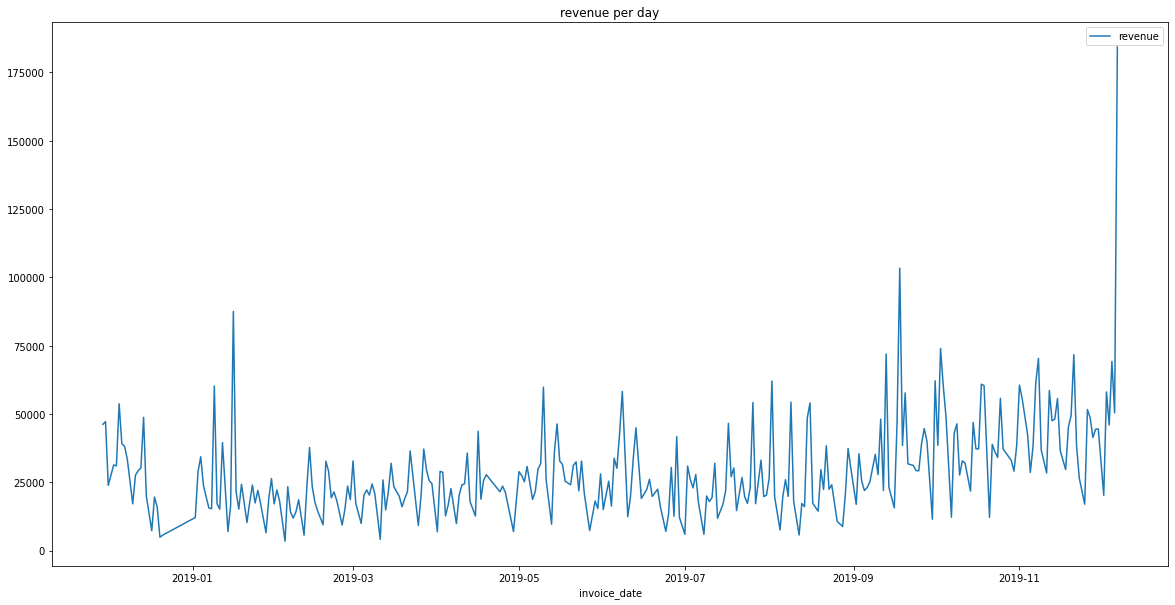

In [19]:
revenue_per_day.plot(figsize=(20,10), title='revenue per day')

Dari hasil perhitungan dan grafik diatas, revenue toko per hari cenderung stabil dan signifikan. Pada beberapa waktu tertentu, revenue meningkat tajam seperti pada bulan Januari ke Februari pada tahun 2019.

#### Revenue Per Month and Year
Selanjutnya kita akan menghitung revenue berdasarkan bulan dan tahun saja.

In [20]:
# melihat revenue per bulan
revenue_per_yearmonth = df.groupby('year_month').agg({'revenue':'sum'})
revenue_per_yearmonth

,revenue
year_month,
2018-11,93390.060
2018-12,477032.670
2019-01,611551.160
2019-02,444922.800
2019-03,576281.930
2019-04,450844.541
2019-05,713856.340
2019-06,628733.190
2019-07,626866.581


<AxesSubplot:title={'center':'revenue per year and month'}, ylabel='year_month'>

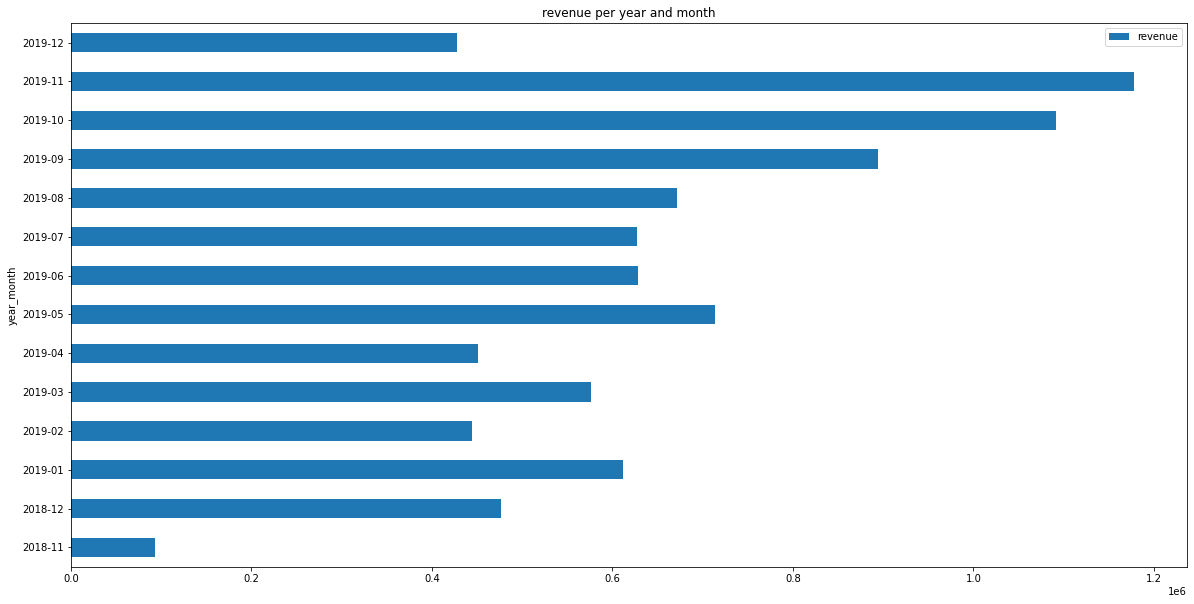

In [21]:
revenue_per_yearmonth.plot(kind='barh',figsize=(20,10), title='revenue per year and month')

Revenue terendah toko adalah saat bulan November pada tahun 2018 ( revenue tidak mencapai 100.000! ), namun revenue ini meningkat tajam di bulan berikutnya sebanyak 4x lipat. Selama 4 bulan berikutnya revenue turun naik secara signifikan. Revenue meningkat cukup drastis dari bulan September ke Oktober dan November 2019. Bulan November 2019 adalah puncak revenue tertinggi yaitu sebesar 1177531.080 ( lebih dari 1 juta ). Sayangnya pada bulan berikutnya, revenue kita turun drastis menjadi 428258.970 saja (berkurang separuh dari bulan kemarin).

#### Average Purchase Size
Kita akan menghitung ukuran pesanan rata-rata yang dilakukan pelanggan per bulan setiap tahunnya.

In [22]:
# menghitung ukuran pesanan rata-rata
avg_purchase_size = df.groupby('year_month').agg({'revenue':'mean'})
avg_purchase_size

,revenue
year_month,
2018-11,24.213135
2018-12,21.869191
2019-01,26.380431
2019-02,22.829432
2019-03,22.163837
2019-04,20.708490
2019-05,24.317221
2019-06,24.168103
2019-07,22.659193


<AxesSubplot:title={'center':'Average Purchase Size'}, ylabel='year_month'>

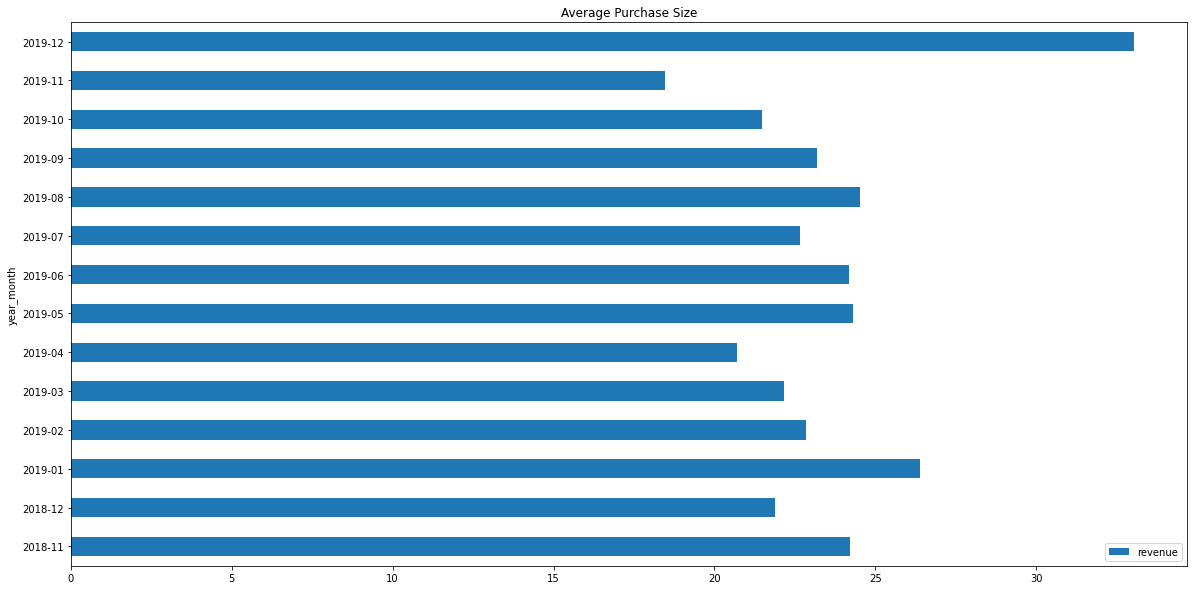

In [23]:
# membuat visualisasi
avg_purchase_size.plot(kind='barh',figsize=(20,10), title='Average Purchase Size')

Hasil ukuran pesanan rata-rata tertinggi ada pada bulan Desember 2019 sejumlah 33.026835 . Sisanya cenderung naik turun yang masih termasuk stabil.

In [24]:
# menghitung rata-rata revenue per user berdasarkan tren bulanan
revenue_per_user = df.groupby(['year_month','CustomerID']).agg({'revenue':'mean'}).reset_index()
revenue_per_user.columns = ['year_month', 'CustomerID', 'revenue_mean'] 
revenue_per_user

,year_month,CustomerID,revenue_mean
0,2018-11,12431,25.589286
1,2018-11,12433,26.289589
2,2018-11,12583,42.793000
3,2018-11,12662,17.432000
4,2018-11,12738,14.122727
...,...,...,...
13042,2019-12,18225,20.642500
13043,2019-12,18237,15.718750
13044,2019-12,18272,15.994783
13045,2019-12,18273,51.000000


<AxesSubplot:xlabel='year_month'>

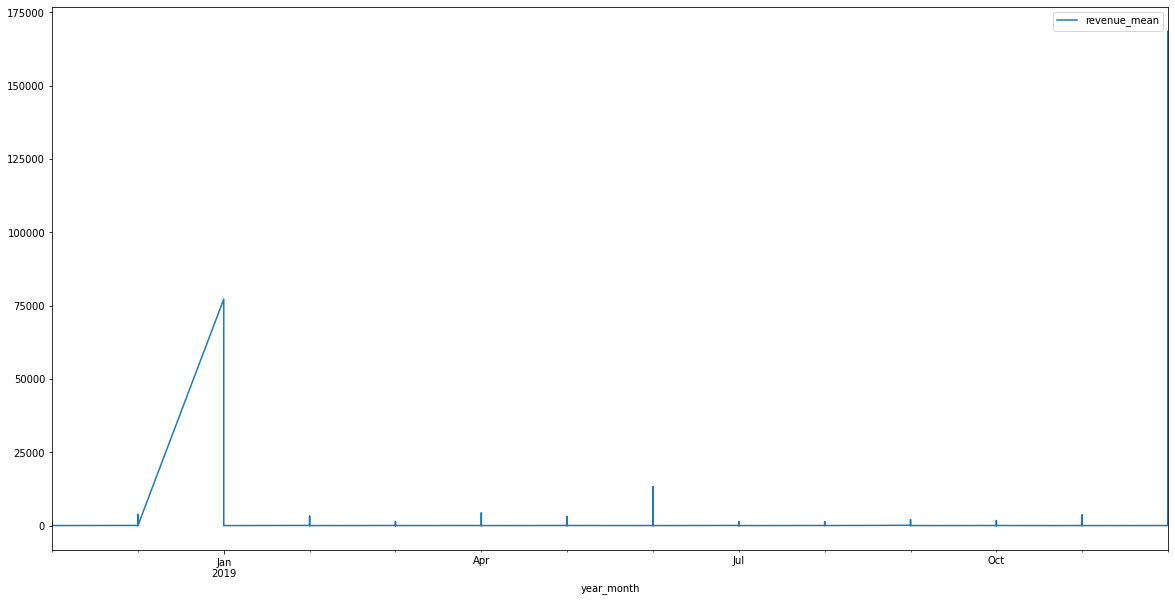

In [25]:
revenue_per_user.plot(y='revenue_mean', x='year_month',figsize=(20,10))

Hasil rata-rata revenue berdasarkan bulan tentunya bervariasi mengingat jumlah produk yang dibeli setiap pelanggan berbeda-beda. Pada grafik, ada beberapa yang hasil rata-rata revenue-nya lebih tinggi, ini dikarenakan jumlah revenue dari pelanggan tersebut lebih tinggi dari pelanggan yang lainnya.

### Menganalisa Range Produk
Pada tahap ini, kita akan membuat kategori/range produk menjadi 3, yaitu main range, secondary range dan additional range. Kita akan membagi produk berdasarkan revenue yang dihasilkan.

In [26]:
df.describe()

,Quantity,UnitPrice,CustomerID,invoice_month,invoice_year,revenue
count,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865,7.537167,2018.934631,22.631500
std,180.492832,22.241836,1713.539549,3.405767,0.247177,311.099224
min,1.000000,0.001000,12346.000000,1.000000,2018.000000,0.001000
25%,2.000000,1.250000,13955.000000,5.000000,2019.000000,4.950000
50%,6.000000,1.950000,15150.000000,8.000000,2019.000000,12.450000
75%,12.000000,3.750000,16791.000000,11.000000,2019.000000,19.800000
max,80995.000000,8142.750000,18287.000000,12.000000,2019.000000,168469.600000


In [27]:
# membuat category berdasarkan revenue
df.loc[df['revenue'] <= 12.450000, 'Category'] = 'Additional'
df.loc[(df['revenue'] > 12.450000) & (df['revenue'] <= 19.800000), 'Category'] = 'Secondary'
df.loc[df['revenue'] > 19.800000, 'Category'] = 'Main'

In [28]:
# melihat berapa banyak value pada masing-masing category
df['Category'].value_counts()

Additional    196351
Secondary     106848
Main           89493
Name: Category, dtype: int64

In [29]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,invoice_date,invoice_month,invoice_year,year_month,revenue,Category
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,2018-11-29,11,2018,2018-11,15.30,Secondary
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,11,2018,2018-11,20.34,Main
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850,2018-11-29,11,2018,2018-11,22.00,Main
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,11,2018,2018-11,20.34,Main
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,11,2018,2018-11,20.34,Main
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680,2019-12-07,12,2019,2019-12,10.20,Additional
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680,2019-12-07,12,2019,2019-12,12.60,Secondary
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680,2019-12-07,12,2019,2019-12,16.60,Secondary
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680,2019-12-07,12,2019,2019-12,16.60,Secondary


Sekarang kita sudah memiliki kolom range produk pada dataset kita. Dengan ini kita dapat mengetahui produk yang dibeli oleh pelanggan termasuk dalam range produk yang mana. 

#### Produk Yang Sering Dibeli Sendiri dan Produk Yang Dibeli Bersama Dengan Produk Dari Range Berbeda
Kita akan mencari tahu produk yang sering dibeli sendiri (main range) dan produk yang dibeli bersamaan dari range berbeda (pelanggan membeli produk main range dan secondary range bersamaan).

In [30]:
products = df.pivot_table(index=['InvoiceNo','Description','Category'],values='Quantity', aggfunc='sum').reset_index()
columns = ['InvoiceNo','Description','Category','Items_Count']
products

,InvoiceNo,Description,Category,Quantity
0,536365,CREAM CUPID HEARTS COAT HANGER,Main,8
1,536365,GLASS STAR FROSTED T-LIGHT HOLDER,Main,6
2,536365,KNITTED UNION FLAG HOT WATER BOTTLE,Main,6
3,536365,RED WOOLLY HOTTIE WHITE HEART.,Main,6
4,536365,SET 7 BABUSHKA NESTING BOXES,Secondary,2
...,...,...,...,...
388520,581587,CIRCUS PARADE LUNCH BOX,Main,12
388521,581587,PACK OF 20 SPACEBOY NAPKINS,Additional,12
388522,581587,PLASTERS IN TIN CIRCUS PARADE,Secondary,12
388523,581587,PLASTERS IN TIN STRONGMAN,Secondary,12


Kita membuat dataframe baru yang memuat informasi yang dibutuhkan, dibanding dengan dataset utama, dataset product ini dapat lebih mudah dilihat dan lebih rapi karena kita hanya akan mencari tahu mengenai produk.

In [31]:
# produk yang sering dibeli sendiri dan yang dibeli bersamaan dengan produk dari range lain
product_list = df.groupby(['InvoiceNo','Category']).agg({'Category' : 'count'})
product_list

Category
InvoiceNo Category            
536365    Main               5
          Secondary          2
536366    Additional         2
536367    Additional         1
          Main               6
...                        ...
581585    Secondary          6
581586    Main               4
581587    Additional         1
          Main               2
          Secondary         12

[43129 rows x 1 columns]

Umumnya pelanggan melakukan pesanan dengan produk dari main range saja atau secondary range saja. Lalu ada pembeli yang membeli produk dari kedua range ( main dan secondary). Produk additional lebih sering dibeli sendiri, jarang dibeli bersamaan dengan produk dari range lain.

#### Produk yang Termasuk Dalam Additional Range
Selain main range dan secondary range, kita juga memiliki additional range. Kita akan melihat secara singkat produk apa saja yang biasanya masuk dalam additional range ini.

In [32]:
df.loc[(df['Category'] == 'Additional')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,invoice_date,invoice_month,invoice_year,year_month,revenue,Category
7,536366,22633,HAND WARMER UNION JACK,6,2018-11-29 08:28:00,1.85,17850,2018-11-29,11,2018,2018-11,11.10,Additional
8,536366,22632,HAND WARMER RED POLKA DOT,6,2018-11-29 08:28:00,1.85,17850,2018-11-29,11,2018,2018-11,11.10,Additional
13,536367,22310,IVORY KNITTED MUG COSY,6,2018-11-29 08:34:00,1.65,13047,2018-11-29,11,2018,2018-11,9.90,Additional
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2018-11-29 08:45:00,0.85,12583,2018-11-29,11,2018,2018-11,10.20,Additional
42,536370,22540,MINI JIGSAW CIRCUS PARADE,24,2018-11-29 08:45:00,0.42,12583,2018-11-29,11,2018,2018-11,10.08,Additional


Produk yang masuk dalam range additional umumnya adalah produk yang tidak termasuk dalam kebutuhan primer maupun sekunder. Dapat dilihat dari data diatas, produk additional terdiri dari stiker kelinci, napkin yang biasa digunakan seperti tisu saat kegiatan makan, magnet/tempelan kulkas, dan mainan.

#### Set Produk yang Sering Ada di Cart Pelanggan

In [33]:
products.head(15)

,InvoiceNo,Description,Category,Quantity
0,536365,CREAM CUPID HEARTS COAT HANGER,Main,8
1,536365,GLASS STAR FROSTED T-LIGHT HOLDER,Main,6
2,536365,KNITTED UNION FLAG HOT WATER BOTTLE,Main,6
3,536365,RED WOOLLY HOTTIE WHITE HEART.,Main,6
4,536365,SET 7 BABUSHKA NESTING BOXES,Secondary,2
5,536365,WHITE HANGING HEART T-LIGHT HOLDER,Secondary,6
6,536365,WHITE METAL LANTERN,Main,6
7,536366,HAND WARMER RED POLKA DOT,Additional,6
8,536366,HAND WARMER UNION JACK,Additional,6
9,536367,ASSORTED COLOUR BIRD ORNAMENT,Main,32


- Pada invoice nomor 536365, pelanggan membeli gantungan untuk coat, 3 holder lampu, botol minum dengan sarung rajut, sarung rajut untuk botol minum dan kotak untuk peternakan. Variasi produk yang dibeli cukup beragam dan kurang berkaitan dengan satu sama lain.

- Untuk invoice nomor 536365, pelanggan hanya membeli 2 item saja yaitu penghangat tangan yang umum digunakan saat musim dingin.

- Pada invoice nomor 536367, pelanggan membeli berbagai produk. Selain 1 set sendok teh dan keset, produk yang dibeli pelanggan ini bisa dianggap sebagai set produk mainan anak, yaitu blok alphabet dan blok puzzle serta feltcraft boneka dan pajangan ornamen berbentuk burung.

In [34]:
products.tail(15)

,InvoiceNo,Description,Category,Quantity
388510,581587,ALARM CLOCK BAKELIKE GREEN,Secondary,4
388511,581587,ALARM CLOCK BAKELIKE IVORY,Secondary,4
388512,581587,ALARM CLOCK BAKELIKE PINK,Secondary,4
388513,581587,ALARM CLOCK BAKELIKE RED,Secondary,4
388514,581587,BAKING SET 9 PIECE RETROSPOT,Secondary,3
388515,581587,CHILDREN'S APRON DOLLY GIRL,Secondary,6
388516,581587,CHILDRENS APRON SPACEBOY DESIGN,Secondary,8
388517,581587,CHILDRENS CUTLERY CIRCUS PARADE,Secondary,4
388518,581587,CHILDRENS CUTLERY DOLLY GIRL,Secondary,4
388519,581587,CHILDRENS CUTLERY SPACEBOY,Secondary,4


- Dari 15 baris terakhir, kita mendapat invoice bernomor sama (581587) yang berarti pelanggan ini membeli banyak produk. Seluruh produk ini sangat berkaitan satu sama lain, maka kita dapat menganggapnya sebagai set produk perlengkapan masak dan makan untuk anak. Pelanggan membeli alarm clock untuk memantau durasi baking, baking set, celemek anak, alat makan anak serta kotak bekal anak. Produk yang tidak termasuk perlengkapan makan hanya plester luka bergambar sejumlah 2 jenis.

#### Berapa bagian dari range total yang ditempati oleh range sekunder?
Mencari tahu range total produk yang termasuk dalam range sekunder.

In [35]:
secondary = df.loc[(df['Category'] == 'Secondary')]

In [36]:
secondary['Description'].value_counts().head(50)

LUNCH BAG RED RETROSPOT                636
WHITE HANGING HEART T-LIGHT HOLDER     608
SET OF 3 CAKE TINS PANTRY DESIGN       597
PACK OF 72 RETROSPOT CAKE CASES        578
ASSORTED COLOUR BIRD ORNAMENT          556
PARTY BUNTING                          532
NATURAL SLATE HEART CHALKBOARD         491
JAM MAKING SET PRINTED                 491
REGENCY CAKESTAND 3 TIER               474
LUNCH BAG CARS BLUE                    455
LUNCH BAG  BLACK SKULL.                449
LUNCH BAG SPACEBOY DESIGN              449
SET OF 3 REGENCY CAKE TINS             442
LUNCH BAG APPLE DESIGN                 439
LUNCH BAG PINK POLKADOT                436
BAKING SET 9 PIECE RETROSPOT           432
HOMEMADE JAM SCENTED CANDLES           420
WOODEN PICTURE FRAME WHITE FINISH      413
LUNCH BAG SUKI DESIGN                  401
SET OF 4 PANTRY JELLY MOULDS           395
SPOTTY BUNTING                         393
HEART OF WICKER SMALL                  385
RETROSPOT TEA SET CERAMIC 11 PC        385
LUNCH BAG W

Diatas adalah sebagian total produk yang ada pada secondary range. Urutan pertama ditempati oleh kotak bekal makan berjumlah 636 pcs. Total produk terendah adalah 1pc.

In [37]:
print(secondary['Description'].value_counts().max())
print(secondary['Description'].value_counts().min())

636
1


In [38]:
# menghitung total produk dari secondary range per invoice
sec_range_product = secondary.groupby(['InvoiceNo']).agg({'Description':'count'}).reset_index()
sec_range_product.columns = ['InvoiceNo', 'Item_Counts']
sec_range_product

,InvoiceNo,Item_Counts
0,536365,2
1,536367,5
2,536368,3
3,536369,1
4,536370,2
...,...,...
14292,581579,10
14293,581581,3
14294,581582,2
14295,581585,6


In [39]:
print(sec_range_product['Item_Counts'].max())

151


Jumlah produk dari secondary range terbanyak yang dibeli dalam 1 invoice berjumlah 151 pcs. Pelanggan ini pasti memiliki banyak uang untuk berbelanja.

## Menguji Hipotesis
### Uji Hipotesis Mengenai Perbedaan Harga Barang Dari Kategori Yang Berbeda
- H0 = Tidak ada perbedaan harga produk dari kategori yang berbeda.
- H1 = Ada perbedaan harga produk dari kategori yang berbeda.

In [40]:
alpha = 0.05

results = st.ttest_ind(df.query('Category == "Main"')['UnitPrice'], df.query('Category == "Secondary"')['UnitPrice'],equal_var=True)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Ada perbedaan harga produk dari kategori yang berbeda.")
else:
    print("Tidak ada perbedaan harga produk dari kategori yang berbeda.")

p-value:  7.227747732152698e-35
Ada perbedaan harga produk dari kategori yang berbeda.


In [41]:
alpha = 0.05

results = st.ttest_ind(df.query('Category == "Main"')['UnitPrice'], df.query('Category == "Additional"')['UnitPrice'],equal_var=True)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Ada perbedaan harga produk dari kategori yang berbeda.")
else:
    print("Tidak ada perbedaan harga produk dari kategori yang berbeda.")

p-value:  1.3559476373463812e-193
Ada perbedaan harga produk dari kategori yang berbeda.


In [42]:
alpha = 0.05

results = st.ttest_ind(df.query('Category == "Secondary"')['UnitPrice'], df.query('Category == "Additional"')['UnitPrice'],equal_var=True)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Ada perbedaan harga produk dari kategori yang berbeda.")
else:
    print("Tidak ada perbedaan harga produk dari kategori yang berbeda.")

p-value:  0.0
Ada perbedaan harga produk dari kategori yang berbeda.


**Harga produk memiliki perbedaan dengan harga produk dari range yang berbeda, hal ini tentunya tidak mengherankan karena jenis produk yang dijual pun beragam sesuai kebutuhan utama, sekunder maupun tambahan.**

#### Uji Hipotesis Mengenai Perbedaan Revenue Dari Produk Dengan Kategori Berbeda.
- H0 = Revenue tidak berpengaruh pada kategori produk yang dibeli.
- H1 = Revenue berpengaruh pada kategori produk yang dibeli.

In [43]:
alpha = 0.05

results = st.ttest_ind(df.query('Category == "Main"')['revenue'], df.query('Category == "Secondary"')['revenue'],equal_var=True)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Revenue berpengaruh pada kategori produk yang dibeli.")
else:
    print("Revenue tidak berpengaruh pada kategori produk yang dibeli.")

p-value:  6.493220351455255e-153
Revenue berpengaruh pada kategori produk yang dibeli.


In [44]:
alpha = 0.05

results = st.ttest_ind(df.query('Category == "Main"')['revenue'], df.query('Category == "Additional"')['revenue'],equal_var=True)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Revenue berpengaruh pada kategori produk yang dibeli.")
else:
    print("Revenue tidak berpengaruh pada kategori produk yang dibeli.")

p-value:  0.0
Revenue berpengaruh pada kategori produk yang dibeli.


In [45]:
alpha = 0.05

results = st.ttest_ind(df.query('Category == "Additional"')['revenue'], df.query('Category == "Secondary"')['revenue'],equal_var=True)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Revenue berpengaruh pada kategori produk yang dibeli.")
else:
    print("Revenue tidak berpengaruh pada kategori produk yang dibeli.")

p-value:  0.0
Revenue berpengaruh pada kategori produk yang dibeli.


**Hasil revenue berpengaruh tergantung dari range mana produk tersebut dibeli** Hal ini sama dengan uji hipotesis sebelumnya karena produk beragam tentunya tidak semua harga produk sama.

## Kesimpulan
- Hasil revenue toko per hari cenderung stabil dan signifikan. Pada beberapa waktu tertentu, revenue meningkat tajam seperti pada bulan Januari ke Februari pada tahun 2019.
- Revenue terendah toko adalah saat bulan November pada tahun 2018 ( revenue tidak mencapai 100.000! ), namun revenue ini meningkat tajam di bulan berikutnya sebanyak 4x lipat. Selama 4 bulan berikutnya revenue turun naik secara signifikan. Revenue meningkat cukup drastis dari bulan September ke Oktober dan November 2019. Bulan November 2019 adalah puncak reveue tertinggi yaitu sebesar 1177531.080 ( lebih dari 1 juta ). Sayangnya pada bulan berikutnya, revenue kita turun drastis menjadi 428258.970 saja (berkurang separuh dari bulan kemarin).
- Hasil ukuran pesanan rata-rata tertinggi ada pada bulan Desember 2019 sejumlah 33.026835 . Sisanya cenderung naik turun yang masih termasuk stabil.
- Umumnya pelanggan melakukan pesanan dengan produk dari main range saja atau secondary range saja. Lalu ada pembeli yang membeli produk dari kedua range ( main dan secondary). Produk additional lebih sering dibeli sendiri, jarang dibeli bersamaan dengan produk dari range lain.
- Produk yang masuk dalam range additional umumnya adalah produk yang tidak termasuk dalam kebutuhan primer maupun sekunder. Dapat dilihat dari data diatas, produk additional terdiri dari stiker kelinci, napkin yang biasa digunakan seperti tisu saat kegiatan makan, magnet/tempelan kulkas, dan mainan.
- Total produk yang ada pada secondary range. Urutan pertama ditempati oleh kotak bekal makan berjumlah 636 pcs. Total produk terendah adalah 1pc. Banyak produk yang hanya memiliki stock sebanyak 1pc.
- Harga produk memiliki perbedaan dengan harga produk dari range yang berbeda, hal ini tentunya tidak mengherankan karena jenis produk yang dijual pun beragam sesuai kebutuhan utama, sekunder maupun tambahan.
- Hasil revenue berpengaruh tergantung dari range mana produk tersebut dibeli Hal ini sama dengan uji hipotesis sebelumnya karena produk beragam tentunya tidak semua harga produk sama.

- link menuju presentasi = https://drive.google.com/file/d/1iPKGskHcQubdWFuhOrcLc3SjgoI1Z95d/view?usp=share_link
- link menuju dashboard = https://public.tableau.com/app/profile/lili.sanjayawati/viz/Purchase_16827753307160/IndividualPurchaseTotal?publish=yes